In [23]:
import numpy as np
import pandas as pd

In [24]:
data = pd.read_csv('fifa19.csv')

In [25]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [27]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [28]:
data.drop(['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo'], axis = 1, inplace = True)


In [71]:
print('The total number of countries: ' .format(data['Nationality'].nunique()))
data['Nationality'].value_counts()

The total number of countries: 


England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
                       ... 
Oman                      1
Andorra                   1
São Tomé & Príncipe       1
Qatar                     1
Malta                     1
Name: Nationality, Length: 164, dtype: int64

In [30]:
data.rename(columns = {'Value':'Player Value'}, inplace = True)

In [31]:
data.head(5)

,Name,Age,Nationality,Overall,Potential,Club,Player Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [37]:
data['Age'].mean()

25.122205745043114

In [38]:
data.isnull().sum()

Name                 0
Age                  0
Nationality          0
Overall              0
Potential            0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 84, dtype: int64

In [39]:
import matplotlib.pyplot as plt


In [41]:
data.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


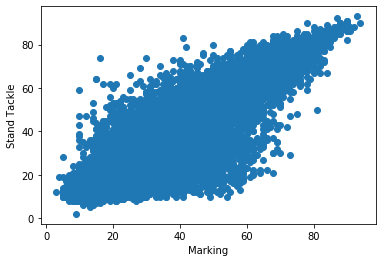

In [45]:
plt.scatter(x = data.Marking, y = data.StandingTackle)
plt.xlabel('Marking')
plt.ylabel('Stand Tackle')
plt.show()

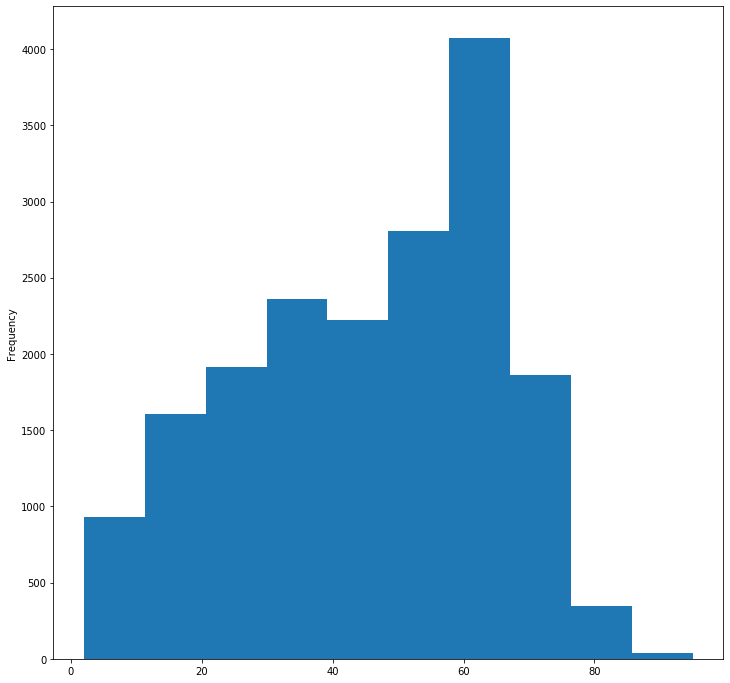

In [46]:
data.Finishing.plot(kind = 'hist', figsize = (12,12))

In [49]:
least_age = data['Age']<19
data[least_age]

,Name,Age,Nationality,Overall,Potential,Club,Player Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
226,M. de Ligt,18,Netherlands,82,91,Ajax,€27M,€11K,1937,Right,...,77.0,84.0,84.0,79.0,12.0,11.0,11.0,12.0,10.0,€43.2M
1004,J. Sancho,18,England,77,89,Borussia Dortmund,€14.5M,€22K,1785,Right,...,64.0,30.0,33.0,36.0,7.0,11.0,10.0,11.0,13.0,€27.6M
1143,Vinícius Júnior,17,Brazil,77,92,Real Madrid,€17.5M,€66K,1849,Right,...,75.0,32.0,25.0,18.0,5.0,7.0,7.0,7.0,10.0,€46.8M
1800,R. Sessegnon,18,England,75,88,Fulham,€12M,€27K,1933,Left,...,79.0,66.0,68.0,62.0,6.0,11.0,7.0,8.0,7.0,€30.3M
2640,G. Chakvetadze,18,Georgia,73,86,KAA Gent,€7M,€10K,1809,Right,...,61.0,29.0,41.0,32.0,10.0,8.0,13.0,8.0,13.0,€14.9M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18200,J. Young,18,Scotland,47,62,Swindon Town,€60K,€1K,1203,Left,...,50.0,15.0,17.0,14.0,11.0,15.0,12.0,12.0,11.0,€143K
18201,D. Walsh,18,Republic of Ireland,47,68,Waterford FC,€60K,€1K,1098,Left,...,43.0,44.0,47.0,53.0,9.0,10.0,9.0,11.0,13.0,€153K
18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,Right,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,Right,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [50]:
oldest_player = data['Age']>40
data[oldest_player]

,Name,Age,Nationality,Overall,Potential,Club,Player Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1120,J. Villar,41,Paraguay,77,77,NaN,€0,€0,1168,Right,...,55.0,13.0,13.0,14.0,75.0,75.0,74.0,78.0,77.0,NaN
4228,B. Nivet,41,France,71,71,ESTAC Troyes,€0,€5K,1785,Right,...,82.0,58.0,56.0,43.0,11.0,7.0,8.0,14.0,7.0,NaN
4741,O. Pérez,45,Mexico,71,71,Pachuca,€160K,€8K,1256,Right,...,62.0,23.0,12.0,11.0,70.0,64.0,65.0,73.0,74.0,€272K
7225,C. Muñoz,41,Argentina,68,68,CD Universidad de Concepción,€60K,€1K,1234,Right,...,62.0,18.0,14.0,19.0,67.0,65.0,68.0,71.0,68.0,€84K
10545,S. Narazaki,42,Japan,65,65,Nagoya Grampus,€40K,€1K,1296,Right,...,45.0,27.0,24.0,22.0,64.0,63.0,62.0,67.0,63.0,€50K
12192,H. Sulaimani,41,Saudi Arabia,63,63,Ohod Club,€0,€3K,1842,Left,...,67.0,62.0,66.0,63.0,15.0,8.0,15.0,14.0,13.0,NaN
15426,M. Tyler,41,England,59,59,Peterborough United,€10K,€1K,1031,Right,...,57.0,24.0,16.0,17.0,61.0,54.0,54.0,63.0,55.0,€18K
17726,T. Warner,44,Trinidad & Tobago,53,53,Accrington Stanley,€0,€1K,926,Right,...,46.0,19.0,15.0,14.0,48.0,56.0,56.0,60.0,44.0,NaN
18183,K. Pilkington,44,England,48,48,Cambridge United,€0,€1K,774,Right,...,56.0,15.0,15.0,13.0,45.0,48.0,44.0,49.0,46.0,NaN


In [54]:
specific_age = data['Age'] == 25
data[specific_age]

,Name,Age,Nationality,Overall,Potential,Club,Player Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,€94K,1331,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
43,M. Icardi,25,Argentina,87,90,Inter,€64.5M,€130K,1940,Right,...,85.0,45.0,24.0,20.0,13.0,9.0,5.0,7.0,9.0,€114.5M
45,P. Pogba,25,France,87,91,Manchester United,€64M,€210K,2247,Right,...,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M
47,R. Lukaku,25,Belgium,87,89,Manchester United,€62.5M,€230K,2031,Left,...,83.0,30.0,30.0,30.0,8.0,15.0,14.0,7.0,10.0,€120.3M
62,R. Varane,25,France,86,91,Real Madrid,€50M,€210K,1895,Right,...,82.0,87.0,88.0,87.0,11.0,11.0,9.0,5.0,14.0,€106.3M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17637,Li Fang,25,China PR,53,56,Chongqing Dangdai Lifan FC SWM Team,€60K,€1K,1354,Right,...,36.0,64.0,61.0,55.0,14.0,6.0,11.0,6.0,5.0,€134K
17638,E. Alarcón,25,Argentina,53,57,Patronato,€50K,€2K,842,Right,...,47.0,12.0,10.0,14.0,56.0,55.0,55.0,50.0,52.0,€76K
17661,Wen Zhixiang,25,China PR,53,56,Henan Jianye FC,€50K,€1K,999,Right,...,29.0,11.0,13.0,19.0,52.0,45.0,44.0,53.0,60.0,€111K
17750,J. Skov Hansen,25,Denmark,52,55,Randers FC,€60K,€2K,1432,Right,...,44.0,35.0,37.0,36.0,13.0,15.0,6.0,11.0,15.0,€80K


In [56]:
#Lets compare two atributes; Age and Potential between all players
data[np.logical_and(data['Age']==25, data['Potential']>75)]

,Name,Age,Nationality,Overall,Potential,Club,Player Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,€94K,1331,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
43,M. Icardi,25,Argentina,87,90,Inter,€64.5M,€130K,1940,Right,...,85.0,45.0,24.0,20.0,13.0,9.0,5.0,7.0,9.0,€114.5M
45,P. Pogba,25,France,87,91,Manchester United,€64M,€210K,2247,Right,...,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M
47,R. Lukaku,25,Belgium,87,89,Manchester United,€62.5M,€230K,2031,Left,...,83.0,30.0,30.0,30.0,8.0,15.0,14.0,7.0,10.0,€120.3M
62,R. Varane,25,France,86,91,Real Madrid,€50M,€210K,1895,Right,...,82.0,87.0,88.0,87.0,11.0,11.0,9.0,5.0,14.0,€106.3M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,S. Davis,25,United States,71,76,New York Red Bulls,€3.1M,€6K,1910,Right,...,71.0,67.0,66.0,62.0,8.0,9.0,9.0,9.0,12.0,€4.9M
5219,J. Scowen,25,England,70,76,Queens Park Rangers,€2.1M,€6K,1849,Right,...,63.0,70.0,72.0,68.0,9.0,14.0,8.0,11.0,9.0,€4.3M
5936,J. Malagón,25,Colombia,69,76,Patriotas Boyacá FC,€1.2M,€1K,1428,Right,...,57.0,71.0,70.0,66.0,9.0,12.0,7.0,7.0,10.0,€1.9M
6485,P. Haring,25,Austria,69,76,Heart of Midlothian,€1.2M,€4K,1733,Right,...,68.0,70.0,68.0,64.0,8.0,9.0,5.0,13.0,8.0,€2.4M


In [59]:
#Same EDA just different code
data[(data['Age']==25) & (data['Potential']>85)]

,Name,Age,Nationality,Overall,Potential,Club,Player Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,€94K,1331,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
43,M. Icardi,25,Argentina,87,90,Inter,€64.5M,€130K,1940,Right,...,85.0,45.0,24.0,20.0,13.0,9.0,5.0,7.0,9.0,€114.5M
45,P. Pogba,25,France,87,91,Manchester United,€64M,€210K,2247,Right,...,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M
47,R. Lukaku,25,Belgium,87,89,Manchester United,€62.5M,€230K,2031,Left,...,83.0,30.0,30.0,30.0,8.0,15.0,14.0,7.0,10.0,€120.3M
62,R. Varane,25,France,86,91,Real Madrid,€50M,€210K,1895,Right,...,82.0,87.0,88.0,87.0,11.0,11.0,9.0,5.0,14.0,€106.3M
63,M. Verratti,25,Italy,86,89,Paris Saint-Germain,€55M,€135K,2149,Right,...,93.0,78.0,83.0,80.0,12.0,12.0,15.0,15.0,10.0,€105.9M
81,Alisson,25,Brazil,85,90,Liverpool,€36.5M,€115K,1320,Right,...,65.0,15.0,19.0,16.0,83.0,81.0,85.0,84.0,88.0,€72.1M
112,Alex Telles,25,Brazil,84,87,FC Porto,€32M,€22K,2259,Left,...,80.0,80.0,81.0,79.0,13.0,8.0,12.0,11.0,14.0,€66.4M
122,F. Thauvin,25,France,84,87,Olympique de Marseille,€39M,€72K,2091,Left,...,82.0,46.0,29.0,31.0,8.0,11.0,14.0,10.0,9.0,€77M
128,M. Perin,25,Italy,84,89,Juventus,€29.5M,€105K,1254,Right,...,65.0,20.0,12.0,19.0,81.0,85.0,71.0,79.0,90.0,€50.9M


In [80]:
#check out players from Nigeria
Nigeria = data.Nationality == 'Nigeria'
data[Nigeria]

,Name,Age,Nationality,Overall,Potential,Club,Player Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
425,W. Ndidi,21,Nigeria,80,85,Leicester City,€17M,€50K,2086,Right,...,74.0,84.0,84.0,83.0,13.0,14.0,7.0,7.0,13.0,€33.6M
789,A. Iwobi,22,Nigeria,78,84,Arsenal,€14M,€81K,1739,Right,...,72.0,30.0,26.0,23.0,14.0,7.0,12.0,14.0,11.0,€29.4M
858,V. Moses,27,Nigeria,78,78,Chelsea,€11M,€105K,2110,Right,...,75.0,74.0,74.0,71.0,9.0,7.0,8.0,16.0,16.0,€20.4M
1022,O. Ighalo,29,Nigeria,77,77,Changchun Yatai FC,€9M,€16K,1880,Right,...,82.0,17.0,45.0,41.0,9.0,11.0,13.0,16.0,8.0,€19.4M
1296,H. Onyekuru,21,Nigeria,76,86,Galatasaray SK,€12.5M,€56K,1855,Right,...,70.0,37.0,38.0,25.0,12.0,9.0,9.0,6.0,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17096,J. Kayode,18,Nigeria,55,70,Rotherham United,€180K,€3K,1286,Right,...,44.0,17.0,18.0,17.0,11.0,14.0,9.0,12.0,7.0,€446K
17160,H. Offia,18,Nigeria,55,66,IK Sirius,€140K,€1K,1336,Right,...,49.0,23.0,25.0,23.0,15.0,7.0,12.0,7.0,7.0,€203K
17261,R. Ayagwa,20,Nigeria,55,67,Lillestrøm SK,€160K,€1K,1527,Right,...,42.0,35.0,53.0,51.0,7.0,7.0,6.0,7.0,6.0,€232K
17652,A. Yusuf,17,Nigeria,53,69,IFK Göteborg,€120K,€1K,1419,Right,...,53.0,28.0,39.0,38.0,14.0,9.0,6.0,7.0,9.0,€225K


In [79]:
#List of players from England
England = data.Nationality == 'England'
data[England]

,Name,Age,Nationality,Overall,Potential,Club,Player Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
16,H. Kane,24,England,89,91,Tottenham Hotspur,€83.5M,€205K,2165,Right,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,€160.7M
60,R. Sterling,23,England,86,89,Manchester City,€56.5M,€195K,2036,Right,...,77.0,47.0,58.0,54.0,15.0,12.0,12.0,15.0,9.0,€108.8M
117,D. Alli,22,England,84,90,Tottenham Hotspur,€42.5M,€115K,2189,Right,...,86.0,70.0,70.0,63.0,7.0,6.0,9.0,11.0,8.0,€87.1M
135,K. Walker,28,England,84,84,Manchester City,€24.5M,€165K,2175,Right,...,75.0,78.0,84.0,83.0,12.0,6.0,16.0,15.0,8.0,€45.3M
180,J. Pickford,24,England,83,88,Everton,€25M,€78K,1435,Left,...,69.0,16.0,20.0,12.0,83.0,78.0,88.0,81.0,86.0,€49.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18198,J. Livesey,18,England,47,70,Burton Albion,€60K,€1K,792,Right,...,34.0,15.0,11.0,13.0,46.0,52.0,58.0,42.0,48.0,€165K
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,Right,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,Right,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,Right,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [87]:
data.corr()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Age,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,-0.241156,0.130545,0.068660,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,0.394972,0.332515,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,0.246319,0.243355,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Special,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,0.866417,0.724244,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,0.191770,0.178373,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,0.307925,0.357416,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,0.741035,0.743439,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,-0.241156,-0.218931,-0.010474,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,-0.076585,-0.006639,...,-0.028023,-0.167523,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255
Crossing,0.130545,0.394972,0.246319,0.866417,0.191770,0.307925,0.741035,-0.076585,1.000000,0.655300,...,0.645805,0.575446,0.443101,0.428963,0.409961,-0.663053,-0.660193,-0.659767,-0.660160,-0.662539
Finishing,0.068660,0.332515,0.243355,0.724244,0.178373,0.357416,0.743439,-0.006639,0.655300,1.000000,...,0.837827,0.533414,0.024218,-0.033023,-0.071811,-0.588752,-0.587145,-0.583268,-0.584852,-0.586913


In [89]:
import seaborn as sns

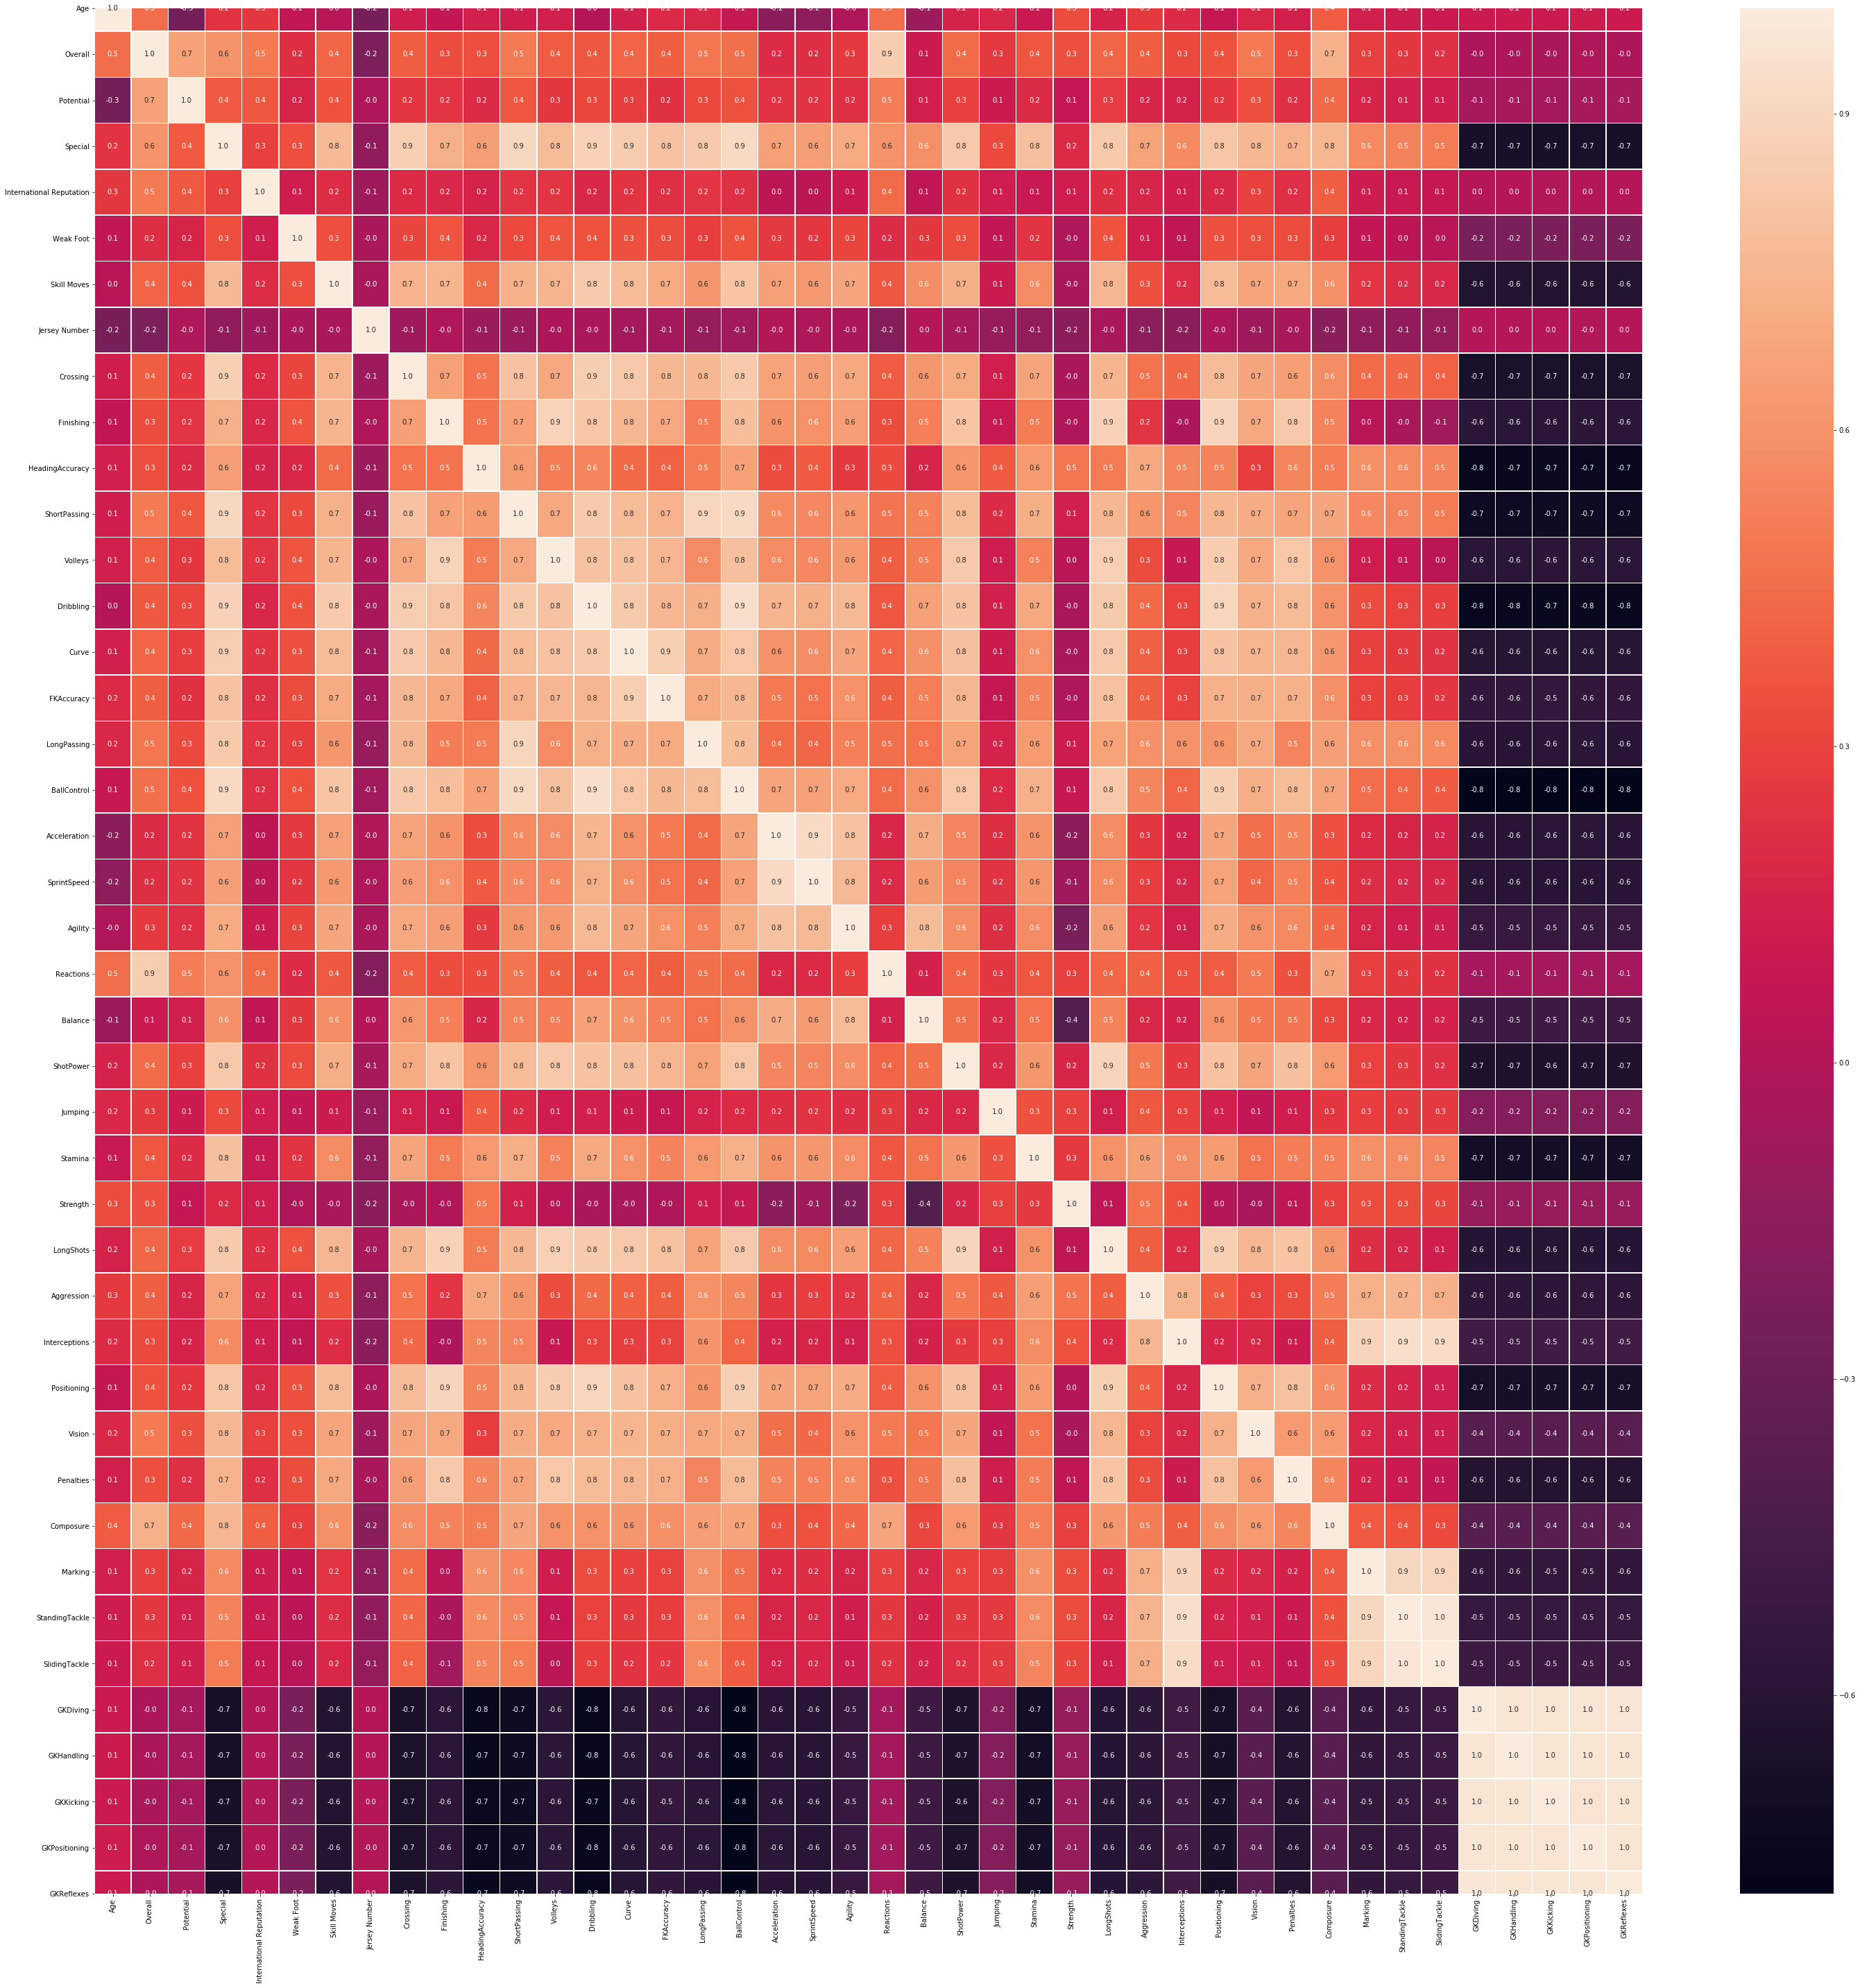

In [90]:

f,ax = plt.subplots(figsize=(50, 50))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [91]:
data['Interceptions'].corr(data['SlidingTackle'])

0.9282822462598999

In [92]:
data['StandingTackle'].corr(data['SlidingTackle'])

0.9746589330477017